In [2]:
import numpy as np
import matplotlib.pyplot as plt

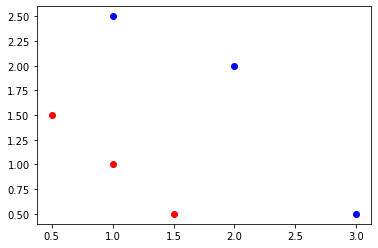

In [3]:
x_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])  #(m,n)
y_train = np.array([0, 0, 0, 1, 1, 1])
m=x_train.shape[0]
for i in range(m):
  if y_train[i]==1:
    plt.scatter(x_train[i,0],x_train[i,1],c='b')
  else:
    plt.scatter(x_train[i,0],x_train[i,1],c='r')
plt.show()                                        #(m,)

In [35]:
def sigmoid(z):
  return 1/(1+np.e**-z)

In [36]:
def compute_output(x,w,b):
  m=x.shape[0]
  n=x.shape[1]
  z=np.dot(x,w)+b
  f_wb=sigmoid(z)
  return f_wb

In [177]:
def logistic_loss(x,y,w,b):
  m=x.shape[0]
  f_wb=compute_output(x,w,b)
  loss=0
  for i in range(m):
    loss+= -y[i]*np.log(f_wb[i]) - (1-y[i])*np.log(1-f_wb[i])
  return loss/m

In [178]:
def compute_gradient(x,y,w,b):
  m,n=x.shape
  f=compute_output(x,w,b)
  dj_dw=np.zeros((n,))
  dj_db=0
  for i in range(m):
    error=f[i]-y[i]
    for j in range(n):
      dj_dw[j]+=error*x[i,j]
    dj_db+=error
  return dj_dw/m,dj_db/m

In [210]:
def gradient_descent(x,y,iter,alpha):
  global w,b
  m,n=x.shape
  it=np.zeros(shape=[iter])
  cst=np.zeros(shape=[iter])
  for i in range(iter):
    dw,db=compute_gradient(x,y,w,b)
    it[i]=i
    cst[i]=logistic_loss(x,y,w,b)
    for j in range(n):
      w[j]=w[j]-alpha*dw[j]
    b=b-alpha*db
  plt.plot(it,cst)
  plt.show()

(2, 1) (1, 1)
[[0.99849882]
 [0.99752738]
 [0.99592986]
 [0.99979657]
 [0.9999833 ]
 [0.99997246]] [3.00138402]
(array([0.49833339, 0.49883943]), array([0.49861807]))


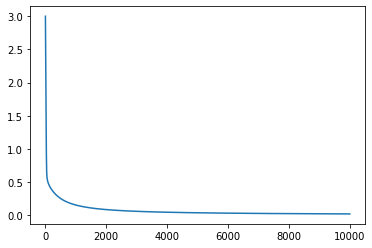

[[5.28976498]
 [5.08670859]] [[-14.24600215]]
[[0.01850462]
 [0.02044162]
 [0.02257672]
 [0.98473255]
 [0.99850919]
 [0.97725793]] [0.01700811]


In [212]:
w=np.array([[2.],[3.]])
b=np.array([[1.]])
print(w.shape,b.shape)
f_wb=compute_output(x_train,w,b)
cost=logistic_loss(x_train,y_train,w,b)
print(f_wb,cost)
print(compute_gradient(x_train,y_train,w,b))
gradient_descent(x_train,y_train,10000,0.1)
print(w,b)
f_wb=compute_output(x_train,w,b)
cost=logistic_loss(x_train,y_train,w,b)
print(f_wb,cost)
